In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [34]:
#한글 깨짐 현상 방지 코드
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 46 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [35]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline

import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도

#한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')

In [36]:
# 데이터 불러오기
df1 = pd.read_csv('/content/drive/MyDrive/2023/코로나/인천광역시_인구.csv',encoding = "euc-kr", engine='python')
df2 = pd.read_csv('/content/drive/MyDrive/2023/코로나/인천광역시_숙박업소현황.csv',encoding = "euc-kr", engine='python')

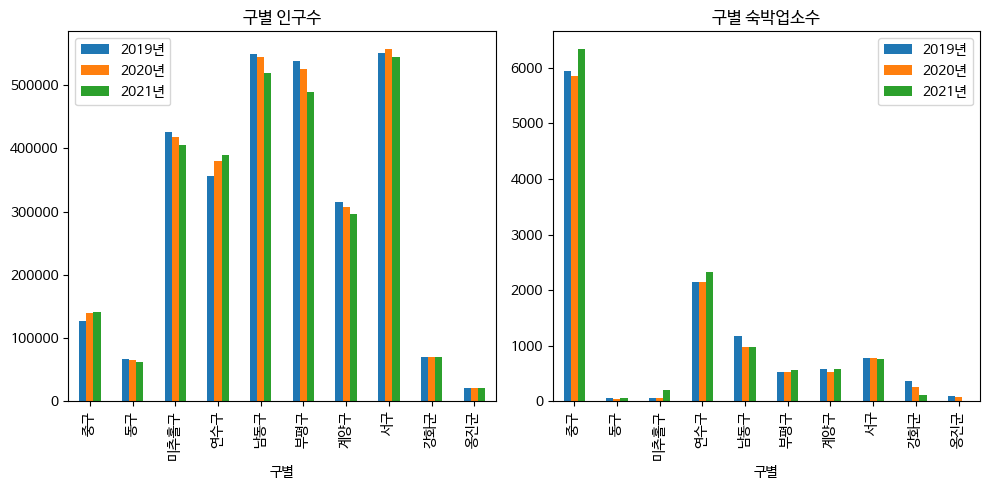

In [37]:
# 지역을 인덱스로 설정
df1.set_index('구별', inplace=True)
df2.set_index('구별', inplace=True)

# 그래프 그리기
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
df1.plot(kind='bar', ax=ax[0])
df2.plot(kind='bar', ax=ax[1])
ax[0].set_title('구별 인구수')
ax[1].set_title('구별 숙박업소수')
plt.tight_layout()
plt.show()

In [26]:
from matplotlib.cm import datad
# 데이터 합치기
data = pd.merge(df1, df2, on='구별',how='left')

data

2019년_x  2020년_x  2021년_x  2019년_y  2020년_y  2021년_y
구별                                                        
중구     126522   139385   141341     5934     5844     6339
동구      67161    65362    62410       53       46       52
미추홀구   425436   418494   405811       50       50      193
연수구    356746   379727   390107     2154     2152     2317
남동구    549691   545131   519667     1172      972      972
부평구    538137   526126   489178      523      518      566
계양구    315903   306817   295492      583      529      583
서구     551311   557415   544726      772      773      760
강화군     69726    70037    69324      369      251      110
옹진군     21218    20791    20373      100       83        0

In [27]:
# 인구수을 내림차순으로 정렬
data = data.sort_values(by='2019년_x', ascending=False)

data

2019년_x  2020년_x  2021년_x  2019년_y  2020년_y  2021년_y
구별                                                        
서구     551311   557415   544726      772      773      760
남동구    549691   545131   519667     1172      972      972
부평구    538137   526126   489178      523      518      566
미추홀구   425436   418494   405811       50       50      193
연수구    356746   379727   390107     2154     2152     2317
계양구    315903   306817   295492      583      529      583
중구     126522   139385   141341     5934     5844     6339
강화군     69726    70037    69324      369      251      110
동구      67161    65362    62410       53       46       52
옹진군     21218    20791    20373      100       83        0

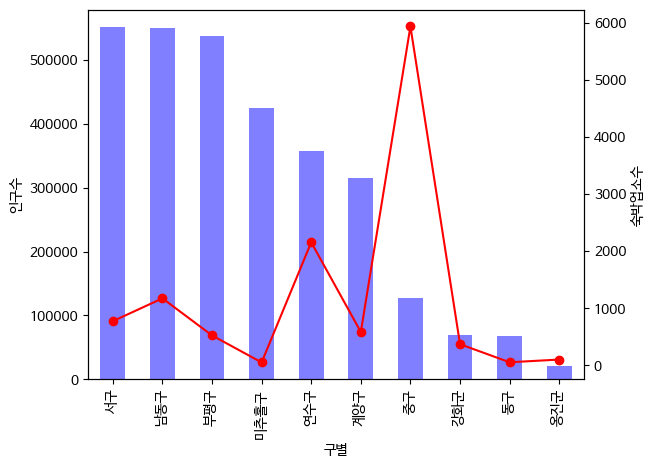

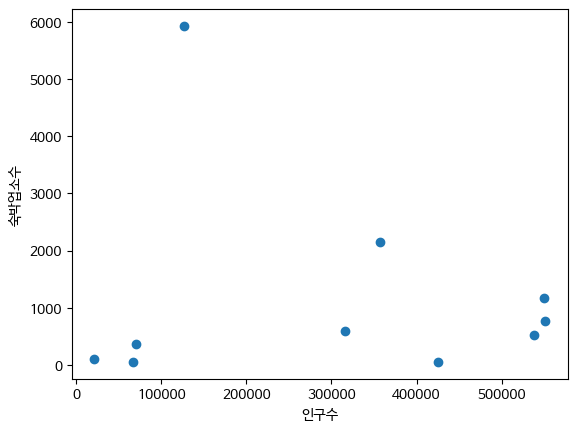

In [28]:
# 비교 그래프 그리기 - 2019년
fig, ax = plt.subplots()
ax2 = ax.twinx()

data.plot(kind='bar', y='2019년_x', ax=ax, color='blue', alpha=0.5, legend=False)
data.plot(kind='line', y='2019년_y', ax=ax2, color='red', marker='o', legend=False)

ax.set_ylabel('인구수')
ax2.set_ylabel('숙박업소수')

plt.show()

# 산점도 그리기
plt.scatter(data['2019년_x'], data['2019년_y'])
plt.xlabel('인구수')
plt.ylabel('숙박업소수')
plt.show()

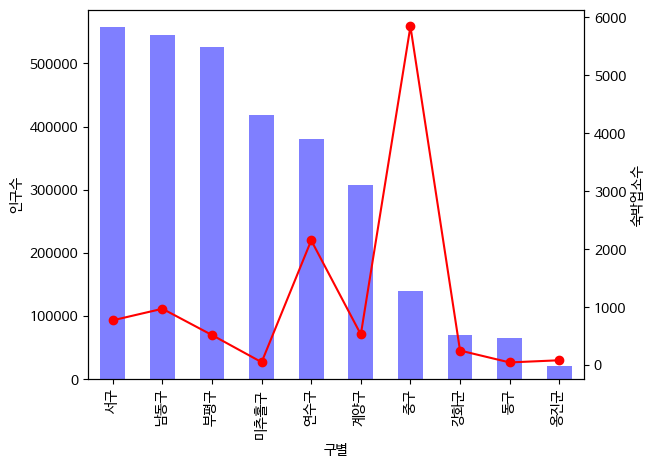

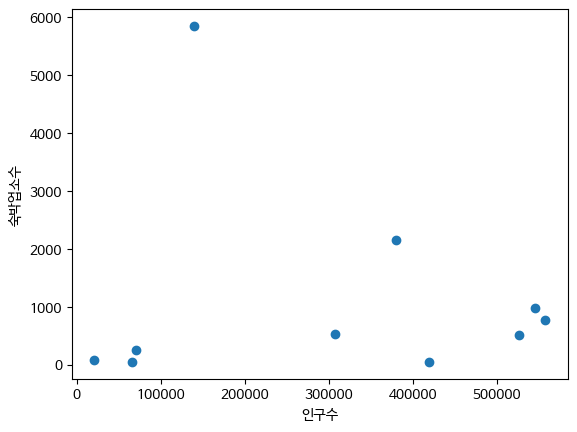

In [29]:
# 비교 그래프 그리기 - 2020년
fig, ax = plt.subplots()
ax2 = ax.twinx()

data.plot(kind='bar', y='2020년_x', ax=ax, color='blue', alpha=0.5, legend=False)
data.plot(kind='line', y='2020년_y', ax=ax2, color='red', marker='o', legend=False)

ax.set_ylabel('인구수')
ax2.set_ylabel('숙박업소수')

plt.show()

# 산점도 그리기
plt.scatter(data['2020년_x'], data['2020년_y'])
plt.xlabel('인구수')
plt.ylabel('숙박업소수')
plt.show()

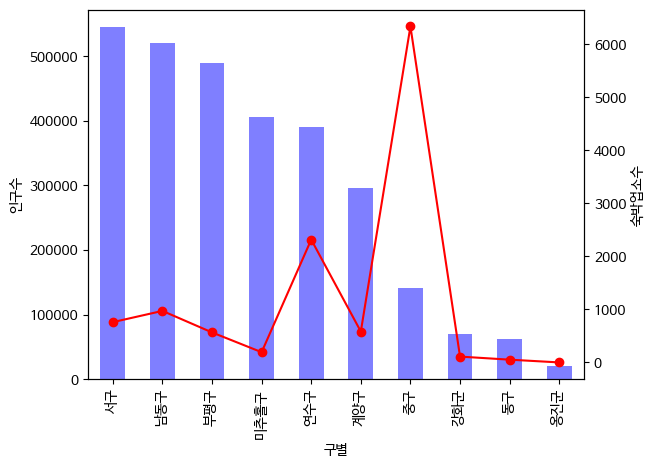

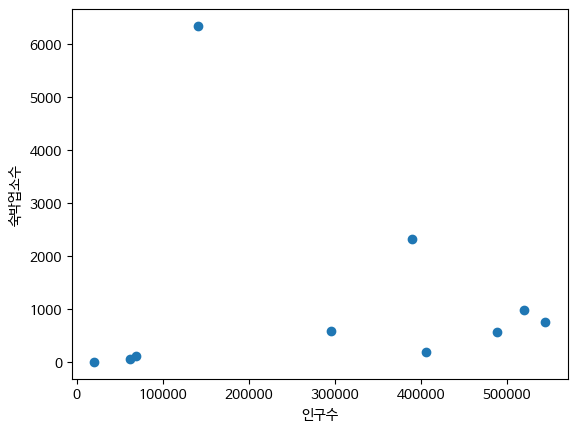

In [30]:
# 비교 그래프 그리기 - 2021년
fig, ax = plt.subplots()
ax2 = ax.twinx()

data.plot(kind='bar', y='2021년_x', ax=ax, color='blue', alpha=0.5, legend=False)
data.plot(kind='line', y='2021년_y', ax=ax2, color='red', marker='o', legend=False)

ax.set_ylabel('인구수')
ax2.set_ylabel('숙박업소수')

plt.show()

# 산점도 그리기
plt.scatter(data['2021년_x'], data['2021년_y'])
plt.xlabel('인구수')
plt.ylabel('숙박업소수')
plt.show()

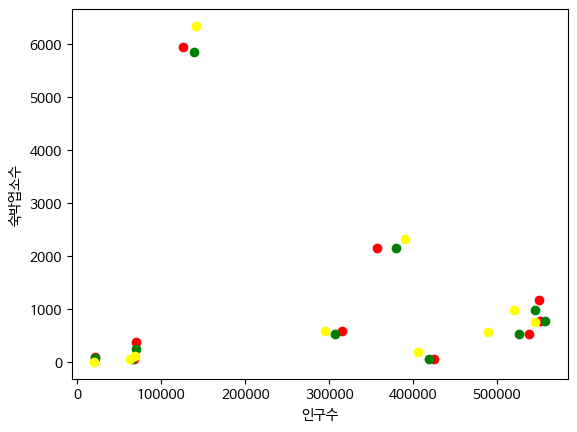

In [31]:
# 산점도 그리기

plt.scatter(data['2019년_x'], data['2019년_y'], color = 'red')
plt.scatter(data['2020년_x'], data['2020년_y'], color = 'green')
plt.scatter(data['2021년_x'], data['2021년_y'], color = 'yellow')

plt.xlabel('인구수')
plt.ylabel('숙박업소수')
plt.show()

In [14]:
# 상관계수 계산 - 2019년
corr = data['2019년_x'].corr(data['2019년_y'])
print(f"인구수와 숙박업소수 간의 상관계수: {corr:.3f}")

인구수와 숙박업소수 간의 상관계수: -0.124


In [11]:
# 상관계수 계산 - 2020년
corr = data['2020년_x'].corr(data['2020년_y'])
print(f"인구수와 숙박업소수 간의 상관계수: {corr:.3f}")

인구수와 숙박업소수 간의 상관계수: -0.096


In [17]:
# 상관계수 계산 - 2021년
corr = data['2021년_x'].corr(data['2021년_y'])
print(f"인구수와 숙박업소수 간의 상관계수: {corr:3f}")

인구수와 숙박업소수 간의 상관계수: -0.066669


In [33]:
# 데이터 불러오기
df1 = pd.read_csv('/content/drive/MyDrive/2023/코로나/인천광역시_인구.csv', encoding='CP949')
df2 = pd.read_csv('/content/drive/MyDrive/2023/코로나/인천광역시_숙박업소현황.csv', encoding='CP949')

# 데이터 합치기
merged_df = pd.merge(df1, df2, on='구별')

# 상관관계 분석
correlation = merged_df[['구별', '2019년_x', '2020년_x', '2021년_x', '2019년_y', '2020년_y', '2021년_y']].corr()

# 상관계수 출력
print(correlation)

          2019년_x   2020년_x   2021년_x   2019년_y   2020년_y   2021년_y
2019년_x  1.000000  0.998794  0.995239 -0.124360 -0.125945 -0.114789
2020년_x  0.998794  1.000000  0.998676 -0.095000 -0.096146 -0.085400
2021년_x  0.995239  0.998676  1.000000 -0.076789 -0.077380 -0.066669
2019년_y -0.124360 -0.095000 -0.076789  1.000000  0.999322  0.997681
2020년_y -0.125945 -0.096146 -0.077380  0.999322  1.000000  0.999122
2021년_y -0.114789 -0.085400 -0.066669  0.997681  0.999122  1.000000


<ipython-input-33-49dad740f120>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = merged_df[['구별', '2019년_x', '2020년_x', '2021년_x', '2019년_y', '2020년_y', '2021년_y']].corr()
